In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
list1 = pd.read_html('http://nl.mylaps.com/evenementen/uitslagen/2019/oct/6/gieten/WedsTot.html',skiprows=4, header=0, decimal=',', thousands='.')
list2 = pd.read_html('http://nl.mylaps.com/evenementen/uitslagen/2019/oct/6/gieten/CSTot.html',skiprows=4, header=0, decimal=',', thousands='.')

In [2]:
df1 = list1[0]
df2 = list2[0]

In [3]:
df = df1.append(df2).sort_values(by='GemTot', ascending=False ).reset_index(drop=True)
df.drop(['DQ'], axis=1, inplace=True)
df.dropna(inplace=True)
df['TotalTime'] = df['BrutoTot'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + float(x[2]) / 60)
df = df.sort_values(by=['TotalTime']).reset_index(drop=True)

In [67]:
mean_series = pd.Series(np.repeat(df['TotalTime'].mean(), df.shape[0]))
median_series = pd.Series(np.repeat(df['TotalTime'].median(), df.shape[0]))

In [63]:
paul = df[(df['Naam'] == 'Paul Huizinga')]['TotalTime'].reset_index().values[0]
mark = df[(df['Naam'] == 'Mark Popken')]['TotalTime'].reset_index().values[0]

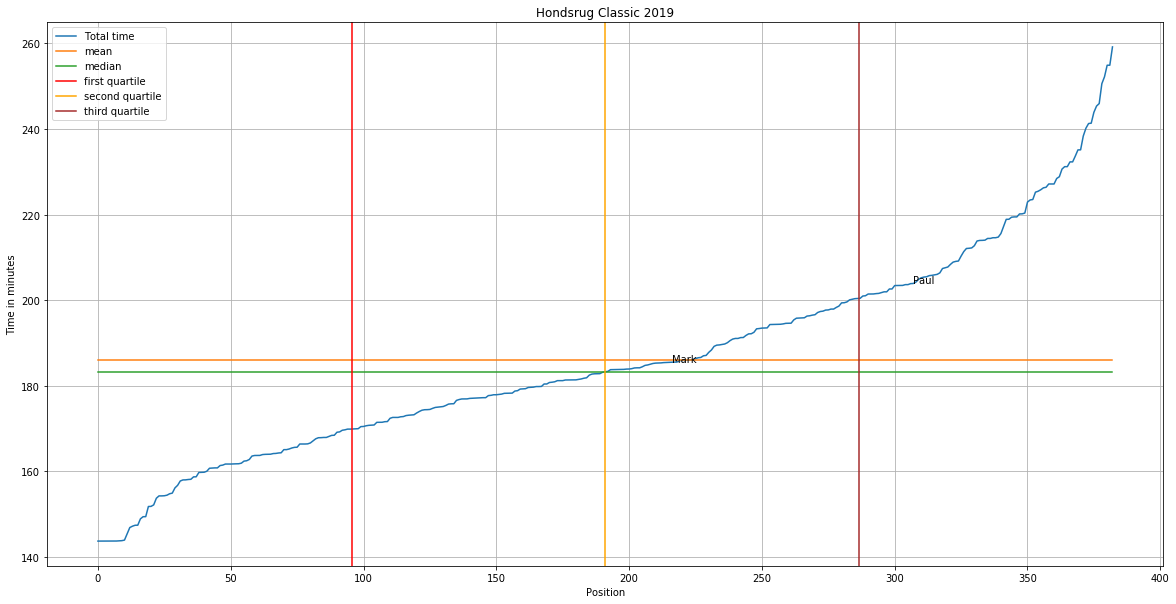

In [133]:
plt.figure(figsize=(20,10))
plt.title('Hondsrug Classic 2019')
df['TotalTime'].plot(label='Total time')
mean_series.plot(label='mean')
median_series.plot(label='median')
plt.text(paul[0], paul[1],'Paul')
plt.text(mark[0], mark[1],'Mark')
plt.axvline(x=np.quantile(df.index.values, .25), color='red', label='first quartile')
plt.axvline(np.quantile(df.index.values, .50), color='orange', label='second quartile')
plt.axvline(np.quantile(df.index.values, .75), color='brown', label='third quartile')
plt.xlabel('Position')
plt.ylabel('Time in minutes')
plt.grid(True)
plt.legend()
plt.savefig('HondsrugClassic2019.png')
plt.show()